In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as vdatasets
import torchvision.utils as vutils
from tensorboardX import SummaryWriter
torch.manual_seed(1)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [5]:
USE_CUDA = torch.cuda.is_available() # gpu 사용

### Toy dataset 

In [6]:
NUM_DATA=50

In [24]:
x1 = torch.linspace(0,5,NUM_DATA) + torch.randn(NUM_DATA)
x2 = torch.cat([torch.zeros(NUM_DATA//2)+torch.abs(torch.randn(NUM_DATA//2)),torch.ones(NUM_DATA//2)-torch.abs(torch.randn(NUM_DATA//2))])
x = torch.cat([x1.unsqueeze(1),x2.unsqueeze(1)],1)
x = Variable(x)

y = torch.cat([torch.zeros(NUM_DATA//2),torch.ones(NUM_DATA//2)])
y = Variable(y).unsqueeze(1)

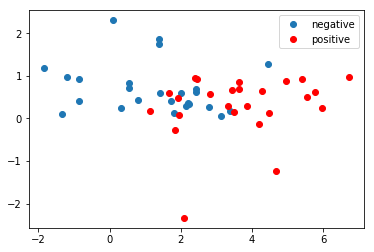

In [25]:
fig, ax = plt.subplots()
ax.plot(x[:,0].data.numpy()[:NUM_DATA//2],x[:,1].data.numpy()[:NUM_DATA//2],'o',label='negative')
ax.plot(x[:,0].data.numpy()[NUM_DATA//2:],x[:,1].data.numpy()[NUM_DATA//2:],'ro',label='positive')
ax.legend()
plt.show()

### NN with 1 hidden layer 

In [26]:
class NN(nn.Module):
    def __init__(self,hidden_size):
        super(NN,self).__init__()
        self.l1 = nn.Linear(2,hidden_size)
        self.l2 = nn.Linear(hidden_size,1)
    
    def forward(self,inputs):
        inputs = F.relu(self.l1(inputs))
        return F.sigmoid(self.l2(inputs))

In [130]:
def train_nn(x,y,model,optimizer,max_try=10000):
    
    epoch = 0
    while loss.data[0]>0.1 and epoch<=max_try:
        model.zero_grad()
        pred = model(x)
        loss = loss_function(pred,y)
        #print("[%02d/%d] loss : %.3f" % (epoch,EPOCH,loss.data[0]))
        loss.backward()
        optimizer.step()
        epoch+=1
    print("done with %d epochs, loss : %.3f" % (epoch,loss.data[0]))
    
    return model

In [109]:
def plot_decision_region(x,y,model):
    X_p = x.data.numpy()
    y_p = y.data.numpy().reshape(NUM_DATA)
    markers = ('x', 's')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y_p))])

    # plot the decision surface
    x1_min, x1_max = X_p[:, 0].min() - 1, X_p[:, 0].max() + 1
    x2_min, x2_max = X_p[:, 1].min() - 1, X_p[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    X_pp = Variable(torch.cat([torch.Tensor(xx1).view(-1,1),torch.Tensor(xx2).view(-1,1)],1))
    Z = torch.round(model(X_pp))
    Z = Z.float().data.numpy()
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_p)):
        plt.scatter(x=X_p[y_p == cl, 0], 
                    y=X_p[y_p == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

### Hidden node : 3 

In [146]:
HIDDEN=3
LR=0.05

model = NN(HIDDEN)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR)

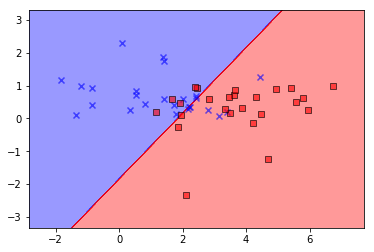

In [148]:
model = train_nn(x,y,model,optimizer)
plot_decision_region(x,y,model)

### Hidden node : 20 

In [149]:
HIDDEN=20
LR=0.05

model = NN(HIDDEN)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR)

done with 10001 epochs, loss : 0.254


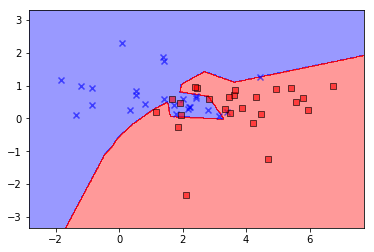

In [150]:
model = train_nn(x,y,model,optimizer)
plot_decision_region(x,y,model)

### Weight Decay (L2 norm) : lambda 0.001 

In [159]:
HIDDEN=20
LR=0.05
LAMBDA=0.001

model = NN(HIDDEN)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR,weight_decay=LAMBDA) # L2 norm

done with 10001 epochs, loss : 0.282


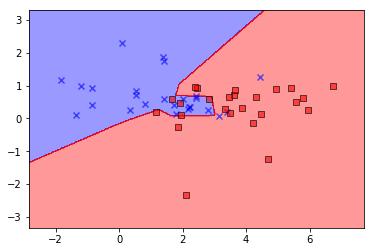

In [160]:
model = train_nn(x,y,model,optimizer)
plot_decision_region(x,y,model)

### Weight Decay (L2 norm) : lambda 0.01

In [161]:
HIDDEN=20
LR=0.05
LAMBDA=0.01

model = NN(HIDDEN)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR,weight_decay=LAMBDA) # L2 norm

done with 10001 epochs, loss : 0.408


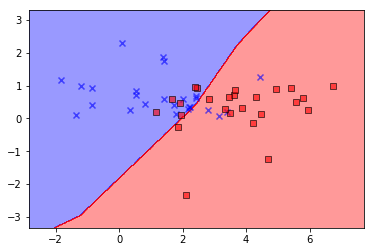

In [162]:
model = train_nn(x,y,model,optimizer)
plot_decision_region(x,y,model)

### Suggested Readings 

* http://cs231n.github.io/neural-networks-1/